## This data was utilized to predict the amount of precipitation (mm/day) based on historical climate data. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('precipitation prediction.csv', skipinitialspace=True)
data

,YEAR,DOY,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,1,NaN,NaN,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,2,NaN,NaN,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,3,NaN,NaN,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,4,NaN,NaN,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,5,NaN,NaN,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,55,37.89,NaN,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,56,37.91,NaN,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,57,37.93,NaN,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,58,37.95,NaN,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


In [3]:
data.head(10)

,YEAR,DOY,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,1,NaN,NaN,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,2,NaN,NaN,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,3,NaN,NaN,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,4,NaN,NaN,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,5,NaN,NaN,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
5,1982,6,NaN,NaN,23.96,21.23,20.84,27.70,85.56,96.74,0.41,0.59,0.11,0.41
6,1982,7,NaN,NaN,24.41,22.08,21.05,27.95,87.38,96.74,0.56,0.84,0.32,11.72
7,1982,8,NaN,NaN,24.13,21.76,21.72,27.21,87.31,96.84,0.45,0.69,0.34,5.52
8,1982,9,NaN,NaN,23.30,21.52,21.14,25.76,90.12,96.97,0.50,0.80,0.30,4.17
9,1982,10,NaN,NaN,23.30,21.89,21.48,25.31,91.81,96.89,0.50,0.74,0.13,5.52


In [4]:
data.columns

Index(['YEAR', 'DOY', 'TopOfAtmosphereIrradiance', 'Sky-Surface-PAR',
       'MeanTemperature_c', 'DewFrostPoint_C', 'MinTemperature_C',
       'MaxTemperature_C', 'RH_%', 'SurfacePressure_kPa', 'WindSpeed',
       'Max_Wind_Speed', 'Min-Wind-Speed', 'Precipitation'],
      dtype='object')

### DOY: means the order of days during the year. I think it is not significant. So I will drop this column.

In [5]:
data.drop(['DOY'], axis = 1, inplace = True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,NaN,NaN,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,NaN,NaN,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,NaN,NaN,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,NaN,NaN,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,NaN,NaN,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,NaN,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,NaN,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,NaN,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,NaN,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
count,15034.000000,14299.000000,13971.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,2002.082413,35.910997,96.106653,25.064464,22.186866,21.799713,28.741622,85.233561,96.860037,0.514602,0.822024,0.263738,5.295825
std,11.881857,1.467361,25.102132,1.222134,0.928594,0.924838,1.972991,6.781859,0.144062,0.095929,0.213518,0.112812,5.807263
min,1982.000000,33.030000,6.100000,20.830000,13.370000,16.980000,22.760000,36.120000,96.260000,0.210000,0.370000,0.000000,0.000000
25%,1992.000000,34.890000,80.260000,24.300000,21.740000,21.240000,27.550000,83.060000,96.770000,0.450000,0.660000,0.170000,1.370000
50%,2002.000000,36.190000,99.400000,24.920000,22.300000,21.790000,28.510000,86.690000,96.870000,0.510000,0.780000,0.300000,3.570000
75%,2012.000000,37.150000,114.590000,25.580000,22.800000,22.330000,29.510000,89.560000,96.960000,0.580000,0.950000,0.350000,7.160000
max,2023.000000,37.950000,153.700000,32.150000,25.170000,26.800000,40.030000,96.940000,97.450000,1.000000,2.190000,0.530000,89.180000


#### The mean of some data is close to 50%, indicating a normal distribution. this data includes (Top of Atmosphere Irradiance, Mean Temperature_c, Dew Frost Point_c,	Min Temperature_C, Max Temperature_C	RH_%.

#### but Precipitation is not normally distributed, and the value of mean and standard deviation are equal??!!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MeanTemperature_c', ylabel='Density'>

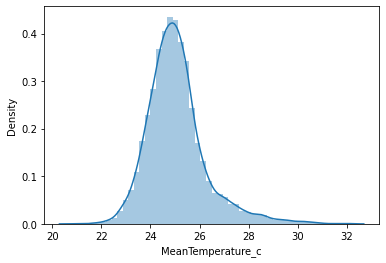

In [8]:
sns.distplot(data['MeanTemperature_c'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Precipitation', ylabel='Density'>

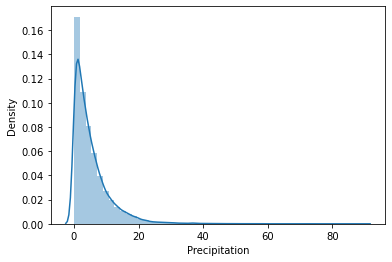

In [9]:
sns.distplot(data['Precipitation'])

## Handling missing values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15034 entries, 0 to 15033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       15034 non-null  int64  
 1   TopOfAtmosphereIrradiance  14299 non-null  float64
 2   Sky-Surface-PAR            13971 non-null  float64
 3   MeanTemperature_c          15031 non-null  float64
 4   DewFrostPoint_C            15031 non-null  float64
 5   MinTemperature_C           15031 non-null  float64
 6   MaxTemperature_C           15031 non-null  float64
 7   RH_%                       15031 non-null  float64
 8   SurfacePressure_kPa        15031 non-null  float64
 9   WindSpeed                  15031 non-null  float64
 10  Max_Wind_Speed             15031 non-null  float64
 11  Min-Wind-Speed             15031 non-null  float64
 12  Precipitation              15031 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB


#### Total data records = 15034, most data have three missing values, all the data float data type and the year only int

In [11]:
data.iloc[data[data['MeanTemperature_c'].isna()].index.tolist(), :]

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
14931,2022,36.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14932,2022,36.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14933,2022,36.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### All the missing values in the same rows so I will replace them by median value

In [12]:
data['MeanTemperature_c'].fillna(data['MeanTemperature_c'].median(), inplace = True)
data['DewFrostPoint_C'].fillna(data['DewFrostPoint_C'].median(), inplace = True)
data['MinTemperature_C'].fillna(data['MinTemperature_C'].median(), inplace = True)
data['MaxTemperature_C'].fillna(data['MaxTemperature_C'].median(), inplace = True)
data['RH_%'].fillna(data['RH_%'].median(), inplace = True)
data['SurfacePressure_kPa'].fillna(data['SurfacePressure_kPa'].median(), inplace = True)
data['WindSpeed'].fillna(data['WindSpeed'].median(), inplace = True)
data['Max_Wind_Speed'].fillna(data['Max_Wind_Speed'].median(), inplace = True)
data['Min-Wind-Speed'].fillna(data['Min-Wind-Speed'].median(), inplace = True)
data['Precipitation'].fillna(data['Precipitation'].median(), inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15034 entries, 0 to 15033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       15034 non-null  int64  
 1   TopOfAtmosphereIrradiance  14299 non-null  float64
 2   Sky-Surface-PAR            13971 non-null  float64
 3   MeanTemperature_c          15034 non-null  float64
 4   DewFrostPoint_C            15034 non-null  float64
 5   MinTemperature_C           15034 non-null  float64
 6   MaxTemperature_C           15034 non-null  float64
 7   RH_%                       15034 non-null  float64
 8   SurfacePressure_kPa        15034 non-null  float64
 9   WindSpeed                  15034 non-null  float64
 10  Max_Wind_Speed             15034 non-null  float64
 11  Min-Wind-Speed             15034 non-null  float64
 12  Precipitation              15034 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB


In [14]:
series = data['TopOfAtmosphereIrradiance'].isna()
print(series.sum())
print()

735



### Approximately five percent of Top of Atmosphere Irradiance is nan values

In [15]:
series = data['Sky-Surface-PAR'].isna()
print(series.sum())
print(series.mean())

1063
0.07070639882932021


### seven percent of Sky-Surface-PAR is nan values

In [16]:
data['TopOfAtmosphereIrradiance'].fillna(data['TopOfAtmosphereIrradiance'].median(), inplace = True)
data['Sky-Surface-PAR'].fillna(data['Sky-Surface-PAR'].median(), inplace = True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15034 entries, 0 to 15033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       15034 non-null  int64  
 1   TopOfAtmosphereIrradiance  15034 non-null  float64
 2   Sky-Surface-PAR            15034 non-null  float64
 3   MeanTemperature_c          15034 non-null  float64
 4   DewFrostPoint_C            15034 non-null  float64
 5   MinTemperature_C           15034 non-null  float64
 6   MaxTemperature_C           15034 non-null  float64
 7   RH_%                       15034 non-null  float64
 8   SurfacePressure_kPa        15034 non-null  float64
 9   WindSpeed                  15034 non-null  float64
 10  Max_Wind_Speed             15034 non-null  float64
 11  Min-Wind-Speed             15034 non-null  float64
 12  Precipitation              15034 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB


In [18]:
data.isna().sum()

YEAR                         0
TopOfAtmosphereIrradiance    0
Sky-Surface-PAR              0
MeanTemperature_c            0
DewFrostPoint_C              0
MinTemperature_C             0
MaxTemperature_C             0
RH_%                         0
SurfacePressure_kPa          0
WindSpeed                    0
Max_Wind_Speed               0
Min-Wind-Speed               0
Precipitation                0
dtype: int64

## Finding the correlation between the features

In [19]:
data.corr()

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
YEAR,1.000000,-0.008206,-0.227758,0.250419,0.180427,0.252648,0.200593,-0.086329,0.028420,-0.006116,-0.002477,-0.016467,-0.080134
TopOfAtmosphereIrradiance,-0.008206,1.000000,0.209597,0.019113,0.272133,0.148989,-0.061728,0.151525,-0.442965,0.110286,0.112944,0.087765,0.063060
Sky-Surface-PAR,-0.227758,0.209597,1.000000,0.105189,-0.000218,-0.051673,0.116368,-0.090295,-0.204109,-0.024032,-0.075269,-0.001806,-0.161506
MeanTemperature_c,0.250419,0.019113,0.105189,1.000000,-0.103556,0.637029,0.938230,-0.815377,-0.418543,-0.077266,-0.009357,-0.134902,-0.280054
DewFrostPoint_C,0.180427,0.272133,-0.000218,-0.103556,1.000000,0.379546,-0.313436,0.650904,-0.230092,-0.037180,-0.071937,0.078698,0.217120
MinTemperature_C,0.252648,0.148989,-0.051673,0.637029,0.379546,1.000000,0.392430,-0.246969,-0.407108,-0.069780,0.039810,-0.123953,0.005753
MaxTemperature_C,0.200593,-0.061728,0.116368,0.938230,-0.313436,0.392430,1.000000,-0.890701,-0.311749,-0.022776,0.022344,-0.077356,-0.328951
RH_%,-0.086329,0.151525,-0.090295,-0.815377,0.650904,-0.246969,-0.890701,1.000000,0.174483,0.064656,-0.008557,0.172471,0.359399
SurfacePressure_kPa,0.028420,-0.442965,-0.204109,-0.418543,-0.230092,-0.407108,-0.311749,0.174483,1.000000,0.002069,-0.022311,0.024419,0.040118
WindSpeed,-0.006116,0.110286,-0.024032,-0.077266,-0.037180,-0.069780,-0.022776,0.064656,0.002069,1.000000,0.829331,0.701639,0.042910


In [20]:
labels = ['Year', 'TOA', 'PAR', 'mean_T', 'DFP', 'min_T', 'max_T', 'RH_%', 'surface_Presure', 'WindSpeed',
          'Max_Wind_Speed', 'Min-Wind-Speed', 'Precipitation' ]

<AxesSubplot:>

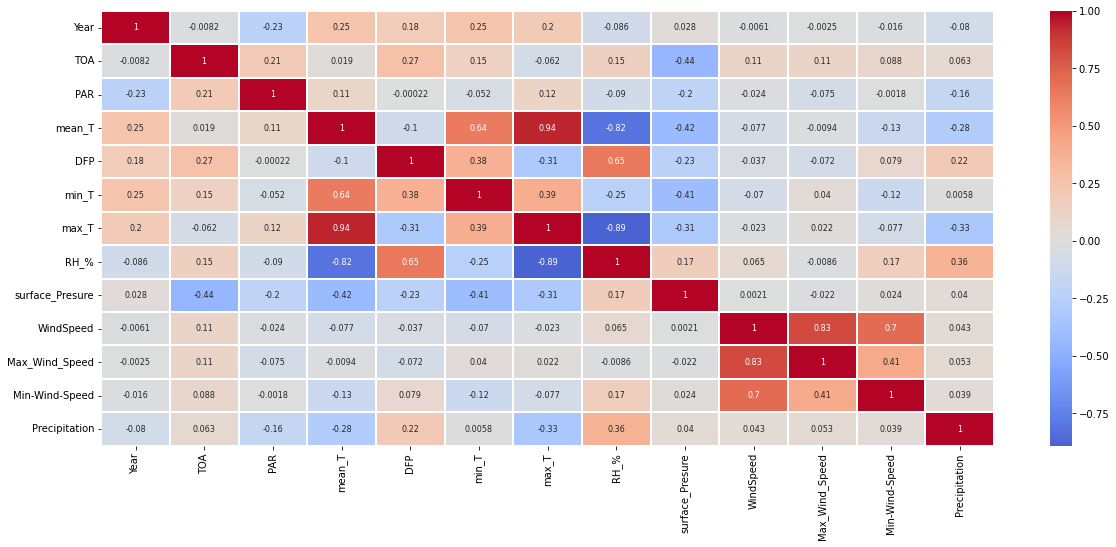

In [21]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(),cmap='coolwarm', center=0,annot=True,
            annot_kws = {'fontsize':8, },
            linecolor='white',linewidths=2, 
           xticklabels = labels, yticklabels = labels
           )

### example of high positive and negative correlation

Text(0, 0.5, 'DewFrostPoint_C')

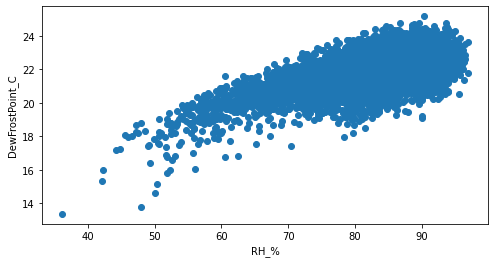

In [22]:
plt.figure(figsize=(8,4))
plt.scatter(data['RH_%'],data['DewFrostPoint_C'])
plt.xlabel('RH_%')
plt.ylabel('DewFrostPoint_C')

Text(0, 0.5, 'MaxTemperature_C')

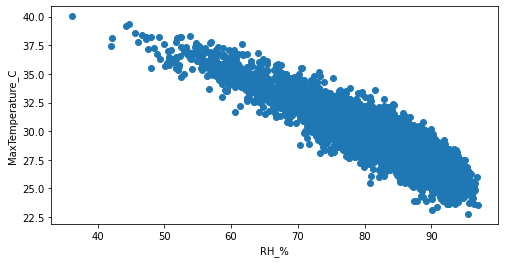

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(data['RH_%'],data['MaxTemperature_C'])
plt.xlabel('RH_%')
plt.ylabel('MaxTemperature_C')

Text(0, 0.5, 'MaxTemperature_C')

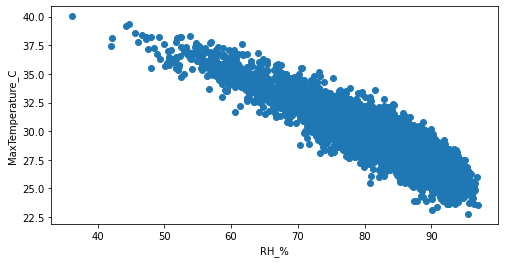

In [24]:
plt.figure(figsize=(8,4))
plt.scatter(data['RH_%'],data['MaxTemperature_C'])
plt.xlabel('RH_%')
plt.ylabel('MaxTemperature_C')

### No correlation

Text(0, 0.5, 'Precipitation')

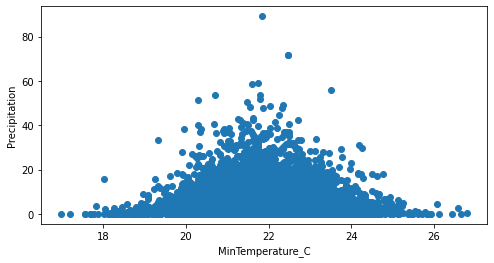

In [25]:
plt.figure(figsize=(8,4))
plt.scatter(data['MinTemperature_C'],data['Precipitation'])
plt.xlabel('MinTemperature_C')
plt.ylabel('Precipitation')

## Handling the outliers 

<AxesSubplot:>

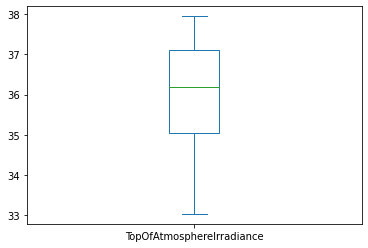

In [26]:
data['TopOfAtmosphereIrradiance'].plot(kind = 'box')

<AxesSubplot:>

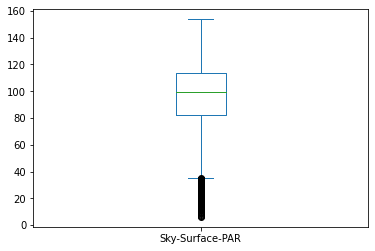

In [27]:
data['Sky-Surface-PAR'].plot(kind = 'box')

In [28]:
q1 = data['Sky-Surface-PAR'].quantile(0.25)
q3 = data['Sky-Surface-PAR'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(82.0275, 113.4, 31.372500000000002, 34.96875, 160.45875)

In [29]:
lower_filt = data['Sky-Surface-PAR'] < lower_whisker
upper_filt = data['Sky-Surface-PAR'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: Sky-Surface-PAR, Length: 15034, dtype: bool

In [30]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([  841,   874,   878,   920,   921,  1049,  1052,  1175,  1182,
             1218,
            ...
            13691, 13700, 13844, 13950, 14159, 14430, 14448, 14463, 14490,
            14598],
           dtype='int64', length=225)

In [31]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

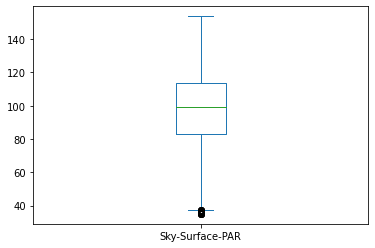

In [32]:
data['Sky-Surface-PAR'].plot(kind = 'box')

<AxesSubplot:>

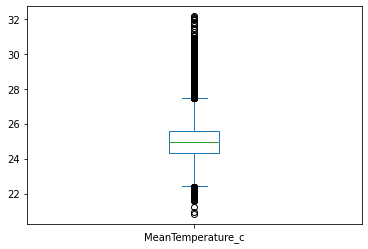

In [33]:
data['MeanTemperature_c'].plot(kind = 'box')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14809 entries, 0 to 15033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       14809 non-null  int64  
 1   TopOfAtmosphereIrradiance  14809 non-null  float64
 2   Sky-Surface-PAR            14809 non-null  float64
 3   MeanTemperature_c          14809 non-null  float64
 4   DewFrostPoint_C            14809 non-null  float64
 5   MinTemperature_C           14809 non-null  float64
 6   MaxTemperature_C           14809 non-null  float64
 7   RH_%                       14809 non-null  float64
 8   SurfacePressure_kPa        14809 non-null  float64
 9   WindSpeed                  14809 non-null  float64
 10  Max_Wind_Speed             14809 non-null  float64
 11  Min-Wind-Speed             14809 non-null  float64
 12  Precipitation              14809 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.6 MB


In [35]:
q1 = data['MeanTemperature_c'].quantile(0.25)
q3 = data['MeanTemperature_c'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(24.31, 25.58, 1.2699999999999996, 22.405, 27.485)

In [36]:
lower_filt = data['MeanTemperature_c'] < lower_whisker
upper_filt = data['MeanTemperature_c'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: MeanTemperature_c, Length: 14809, dtype: bool

In [37]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([  330,   333,   334,   590,   649,   685,   696,   736,   737,
              738,
            ...
            13980, 13984, 13985, 13993, 13994, 13995, 13998, 13999, 14003,
            14294],
           dtype='int64', length=750)

In [38]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

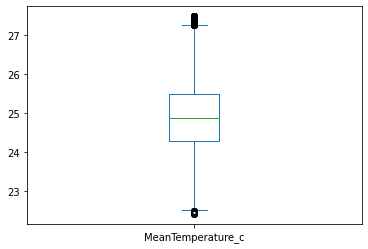

In [39]:
data['MeanTemperature_c'].plot(kind = 'box')

<AxesSubplot:>

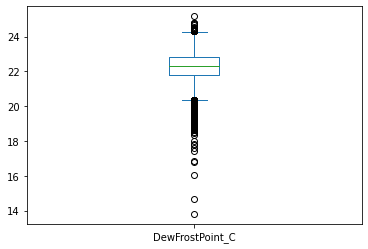

In [40]:
data['DewFrostPoint_C'].plot(kind = 'box')

In [41]:
q1 = data['DewFrostPoint_C'].quantile(0.25)
q3 = data['DewFrostPoint_C'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(21.82, 22.81, 0.9899999999999984, 20.335, 24.294999999999995)

In [42]:
lower_filt = data['DewFrostPoint_C'] < lower_whisker
upper_filt = data['DewFrostPoint_C'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: DewFrostPoint_C, Length: 14059, dtype: bool

In [43]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([   41,   196,   197,   198,   199,   200,   371,   450,   739,
              745,
            ...
            14078, 14079, 14096, 14097, 14295, 14438, 14439, 14452, 14453,
            14454],
           dtype='int64', length=375)

In [44]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

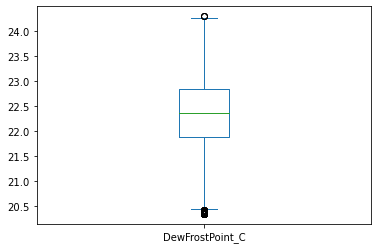

In [45]:
data['DewFrostPoint_C'].plot(kind = 'box')

<AxesSubplot:>

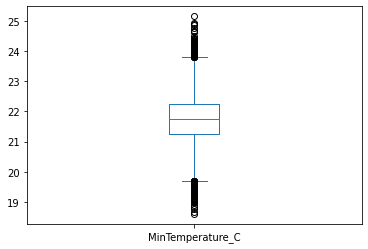

In [46]:
data['MinTemperature_C'].plot(kind = 'box')

In [47]:
q1 = data['MinTemperature_C'].quantile(0.25)
q3 = data['MinTemperature_C'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(21.24, 22.26, 1.0200000000000031, 19.709999999999994, 23.790000000000006)

In [48]:
lower_filt = data['MinTemperature_C'] < lower_whisker
upper_filt = data['MinTemperature_C'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: MinTemperature_C, Length: 13684, dtype: bool

In [49]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([   42,    45,   372,   375,   383,   394,   726,   774,   775,
              932,
            ...
            13939, 13946, 13954, 13969, 13971, 13978, 13986, 14004, 14657,
            14856],
           dtype='int64', length=179)

In [50]:
data.drop(outlier_indices, axis = 0, inplace= True)

<AxesSubplot:>

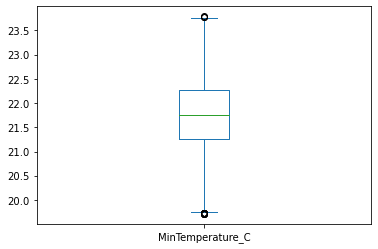

In [51]:
data['MinTemperature_C'].plot(kind = 'box')

In [52]:
data.columns

Index(['YEAR', 'TopOfAtmosphereIrradiance', 'Sky-Surface-PAR',
       'MeanTemperature_c', 'DewFrostPoint_C', 'MinTemperature_C',
       'MaxTemperature_C', 'RH_%', 'SurfacePressure_kPa', 'WindSpeed',
       'Max_Wind_Speed', 'Min-Wind-Speed', 'Precipitation'],
      dtype='object')

<AxesSubplot:>

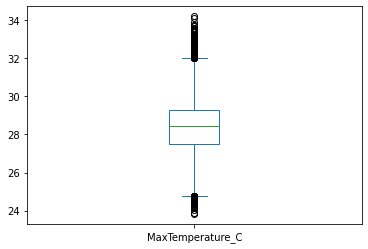

In [53]:
data['MaxTemperature_C'].plot(kind = 'box')

In [54]:
q1 = data['MaxTemperature_C'].quantile(0.25)
q3 = data['MaxTemperature_C'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(27.5, 29.31, 1.8099999999999987, 24.785000000000004, 32.025)

In [55]:
lower_filt = data['MaxTemperature_C'] < lower_whisker
upper_filt = data['MaxTemperature_C'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: MaxTemperature_C, Length: 13505, dtype: bool

In [56]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([   18,    44,   129,   154,   285,   563,   634,   718,   723,
             1346,
            ...
            13952, 13973, 13983, 13992, 13997, 14002, 14608, 14708, 14711,
            14922],
           dtype='int64', length=312)

In [57]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

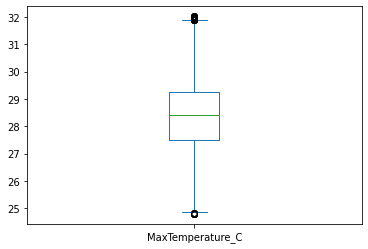

In [58]:
data['MaxTemperature_C'].plot(kind = 'box')

<AxesSubplot:>

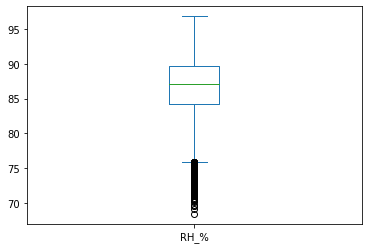

In [59]:
data['RH_%'].plot(kind = 'box')

In [60]:
q1 = data['RH_%'].quantile(0.25)
q3 = data['RH_%'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(84.19, 89.75, 5.560000000000002, 75.85, 98.09)

In [61]:
lower_filt = data['RH_%'] < lower_whisker
upper_filt = data['RH_%'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: RH_%, Length: 13193, dtype: bool

In [62]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([ 1141,  1687,  2583,  2763,  3710,  3711,  3879,  4059,  4061,
             4213,
            ...
            13222, 13340, 13341, 13342, 13352, 13899, 13900, 13901, 14284,
            14814],
           dtype='int64', length=229)

In [63]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

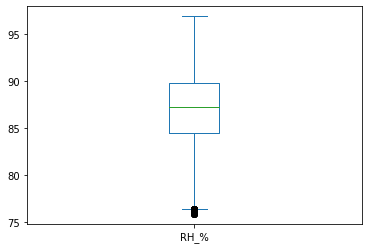

In [64]:
data['RH_%'].plot(kind = 'box')

<AxesSubplot:>

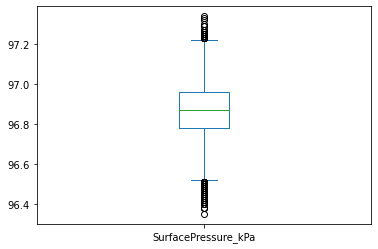

In [65]:
data['SurfacePressure_kPa'].plot(kind = 'box')

In [66]:
q1 = data['SurfacePressure_kPa'].quantile(0.25)
q3 = data['SurfacePressure_kPa'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(96.78, 96.96, 0.1799999999999926, 96.51000000000002, 97.22999999999999)

In [67]:
lower_filt = data['SurfacePressure_kPa'] < lower_whisker
upper_filt = data['SurfacePressure_kPa'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: SurfacePressure_kPa, Length: 12964, dtype: bool

In [68]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([  808,   809,   812,  1084,  1085,  1086,  1107,  1161,  1162,
             1163,
            ...
            12229, 12561, 12562, 12583, 12584, 12585, 13320, 13321, 14413,
            14446],
           dtype='int64', length=108)

In [69]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

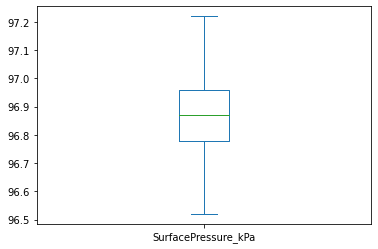

In [70]:
data['SurfacePressure_kPa'].plot(kind = 'box')

<AxesSubplot:>

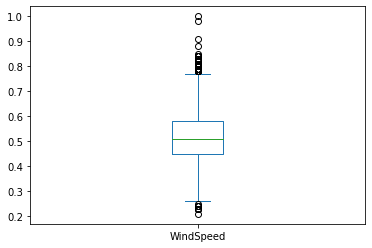

In [71]:
data['WindSpeed'].plot(kind = 'box')

In [72]:
q1 = data['WindSpeed'].quantile(0.25)
q3 = data['WindSpeed'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(0.45, 0.58, 0.12999999999999995, 0.2550000000000001, 0.7749999999999999)

In [73]:
lower_filt = data['WindSpeed'] < lower_whisker
upper_filt = data['WindSpeed'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: WindSpeed, Length: 12856, dtype: bool

In [74]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([  481,   640,   684,   760,   787,   976,  1061,  1118,  1173,
             1500,  1718,  1737,  2135,  2975,  2997,  3429,  3434,  3477,
             3611,  3663,  3708,  3914,  4084,  4092,  4093,  4275,  4424,
             4437,  4607,  4654,  5114,  5250,  5974,  6929,  7137,  7158,
             7260,  7405,  7557,  7753,  7915,  8080,  8099,  8758,  8967,
             9173,  9182,  9197,  9478,  9662, 10375, 11011, 11372, 12212,
            12303, 12321, 12351, 12633, 12829, 13641, 13882, 13940, 14753,
            14821, 14855],
           dtype='int64')

In [75]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

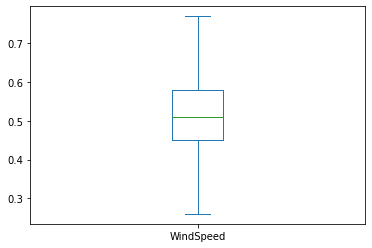

In [76]:
data['WindSpeed'].plot(kind = 'box')

<AxesSubplot:>

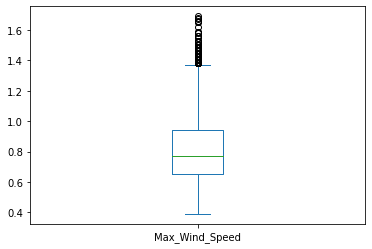

In [77]:
data['Max_Wind_Speed'].plot(kind = 'box')

In [78]:
q1 = data['Max_Wind_Speed'].quantile(0.25)
q3 = data['Max_Wind_Speed'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(0.65, 0.94, 0.2899999999999999, 0.21500000000000014, 1.3749999999999998)

In [79]:
lower_filt = data['Max_Wind_Speed'] < lower_whisker
upper_filt = data['Max_Wind_Speed'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: Max_Wind_Speed, Length: 12791, dtype: bool

In [80]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([  273,   585,   605,   669,   773,   784,   796,   824,   844,
              999,
            ...
            14622, 14680, 14681, 14709, 14710, 14763, 14818, 14827, 14836,
            15026],
           dtype='int64', length=112)

In [81]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

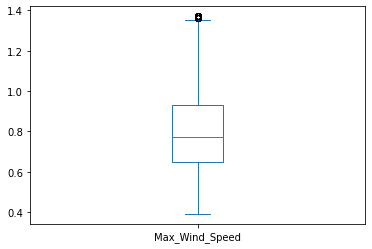

In [82]:
data['Max_Wind_Speed'].plot(kind = 'box')

<AxesSubplot:>

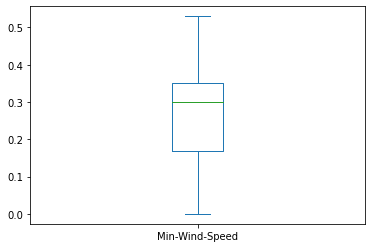

In [83]:
data['Min-Wind-Speed'].plot(kind = 'box')

<AxesSubplot:>

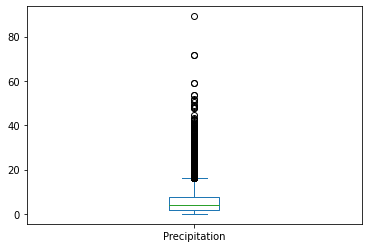

In [84]:
data['Precipitation'].plot(kind = 'box')

In [85]:
q1 = data['Precipitation'].quantile(0.25)
q3 = data['Precipitation'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(1.62, 7.52, 5.8999999999999995, -7.2299999999999995, 16.369999999999997)

In [86]:
lower_filt = data['Precipitation'] < lower_whisker
upper_filt = data['Precipitation'] > upper_whisker
filt = lower_filt | upper_filt
filt

0        False
1        False
2        False
3        False
4        False
         ...  
15029    False
15030    False
15031    False
15032    False
15033    False
Name: Precipitation, Length: 12679, dtype: bool

In [87]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([   11,    12,    13,    21,    22,    29,    61,    89,    99,
              130,
            ...
            14850, 14854, 14897, 14917, 14918, 14930, 14935, 14938, 14977,
            14990],
           dtype='int64', length=671)

In [88]:
data.drop(outlier_indices, axis = 0, inplace= True)
data

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
0,1982,36.19,99.4,24.55,21.76,21.04,28.43,85.31,96.73,0.45,0.68,0.11,2.32
1,1982,36.19,99.4,25.44,21.68,21.39,29.51,80.50,96.60,0.30,0.60,0.02,0.73
2,1982,36.19,99.4,24.90,22.59,22.26,28.30,87.44,96.61,0.43,0.62,0.30,1.02
3,1982,36.19,99.4,24.40,22.35,21.76,27.78,88.94,96.70,0.47,0.59,0.21,3.88
4,1982,36.19,99.4,23.95,21.35,21.73,26.94,86.19,96.79,0.41,0.58,0.15,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,2023,37.89,99.4,25.03,23.18,22.23,28.48,89.94,96.73,0.52,0.82,0.30,2.31
15030,2023,37.91,99.4,25.92,23.23,22.14,30.16,85.94,96.73,0.62,1.03,0.37,0.97
15031,2023,37.93,99.4,25.80,23.10,22.72,28.90,85.62,96.84,0.40,0.64,0.07,1.61
15032,2023,37.95,99.4,25.46,23.19,22.62,29.22,87.81,96.94,0.28,0.45,0.05,5.44


<AxesSubplot:>

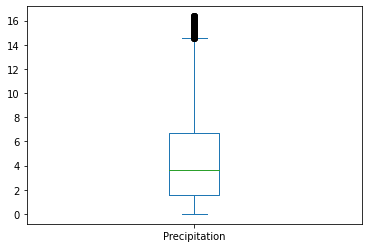

In [89]:
data['Precipitation'].plot(kind = 'box')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12008 entries, 0 to 15033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       12008 non-null  int64  
 1   TopOfAtmosphereIrradiance  12008 non-null  float64
 2   Sky-Surface-PAR            12008 non-null  float64
 3   MeanTemperature_c          12008 non-null  float64
 4   DewFrostPoint_C            12008 non-null  float64
 5   MinTemperature_C           12008 non-null  float64
 6   MaxTemperature_C           12008 non-null  float64
 7   RH_%                       12008 non-null  float64
 8   SurfacePressure_kPa        12008 non-null  float64
 9   WindSpeed                  12008 non-null  float64
 10  Max_Wind_Speed             12008 non-null  float64
 11  Min-Wind-Speed             12008 non-null  float64
 12  Precipitation              12008 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [91]:
data.corr()

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
YEAR,1.000000,-0.008143,-0.258662,0.305655,0.246408,0.252350,0.241575,-0.091403,0.051051,-0.004645,-0.010457,-0.005421,-0.109850
TopOfAtmosphereIrradiance,-0.008143,1.000000,0.217139,0.017077,0.262778,0.121129,-0.069323,0.198470,-0.433011,0.123181,0.113384,0.095634,0.051255
Sky-Surface-PAR,-0.258662,0.217139,1.000000,0.117362,0.026596,-0.058245,0.121198,-0.100706,-0.208998,-0.021032,-0.073450,-0.006473,-0.132592
MeanTemperature_c,0.305655,0.017077,0.117362,1.000000,0.397870,0.519158,0.888278,-0.651610,-0.313284,-0.192313,-0.178169,-0.156496,-0.260176
DewFrostPoint_C,0.246408,0.262778,0.026596,0.397870,1.000000,0.697753,0.088754,0.434045,-0.413332,0.063114,0.020718,0.122606,0.144480
MinTemperature_C,0.252350,0.121129,-0.058245,0.519158,0.697753,1.000000,0.171202,0.062838,-0.311110,-0.113781,-0.041809,-0.109069,0.054922
MaxTemperature_C,0.241575,-0.069323,0.121198,0.888278,0.088754,0.171202,1.000000,-0.784926,-0.169483,-0.117025,-0.120930,-0.079824,-0.314863
RH_%,-0.091403,0.198470,-0.100706,-0.651610,0.434045,0.062838,-0.784926,1.000000,-0.029565,0.253756,0.207466,0.270180,0.378730
SurfacePressure_kPa,0.051051,-0.433011,-0.208998,-0.313284,-0.413332,-0.311110,-0.169483,-0.029565,1.000000,0.034691,0.034333,0.025532,0.011742
WindSpeed,-0.004645,0.123181,-0.021032,-0.192313,0.063114,-0.113781,-0.117025,0.253756,0.034691,1.000000,0.821442,0.724566,0.041681


In [92]:
# sns.pairplot(data,hue='Precipitation',palette='coolwarm')

In [93]:
data.describe()

,YEAR,TopOfAtmosphereIrradiance,Sky-Surface-PAR,MeanTemperature_c,DewFrostPoint_C,MinTemperature_C,MaxTemperature_C,RH_%,SurfacePressure_kPa,WindSpeed,Max_Wind_Speed,Min-Wind-Speed,Precipitation
count,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000,12008.000000
mean,2002.159560,35.952920,97.763129,24.864826,22.361000,21.733502,28.387004,86.749684,96.867595,0.508176,0.800240,0.263413,4.593095
std,12.279254,1.390193,22.433443,0.804760,0.670413,0.738893,1.297963,3.865943,0.131423,0.090237,0.193027,0.112080,3.827149
min,1982.000000,33.030000,35.000000,22.420000,20.340000,19.710000,24.790000,75.880000,96.520000,0.260000,0.390000,0.000000,0.000000
25%,1991.000000,35.230000,83.860000,24.330000,21.920000,21.230000,27.550000,84.250000,96.780000,0.450000,0.650000,0.170000,1.530000
50%,2002.000000,36.190000,99.400000,24.870000,22.390000,21.730000,28.410000,87.060000,96.870000,0.510000,0.770000,0.300000,3.610000
75%,2013.000000,37.090000,113.630000,25.400000,22.830000,22.230000,29.230000,89.560000,96.960000,0.570000,0.930000,0.350000,6.732500
max,2023.000000,37.950000,153.700000,27.470000,24.290000,23.780000,32.010000,96.560000,97.220000,0.770000,1.370000,0.530000,16.360000


### After removing the outliers noticed that:
#### 1) find some outliers in the box plot
#### 2) Approximately 20% of the data set was removed
#### 3) The correlation doesn't increase

# Linear Regression model

In [94]:
x = data.drop('Precipitation', axis=1).values
y = data['Precipitation'].values

In [95]:
x.shape

(12008, 12)

In [96]:
y.shape

(12008,)

## train test split

In [97]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size= 0.2) # 80% train, 20% test

In [98]:
# model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)  # training

LinearRegression()

In [99]:
y_pred = model.predict(test_x)

In [100]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, test_y)

12.301875453662259

In [101]:
#plt.subplot(3,3,3)
#plt.hist(data['Precipitation', 'MaxTemperature_C'], color = 'lightblue', edgecolor = 'black', alpha = 0.7)
#plt.xlabel('Precipitation')